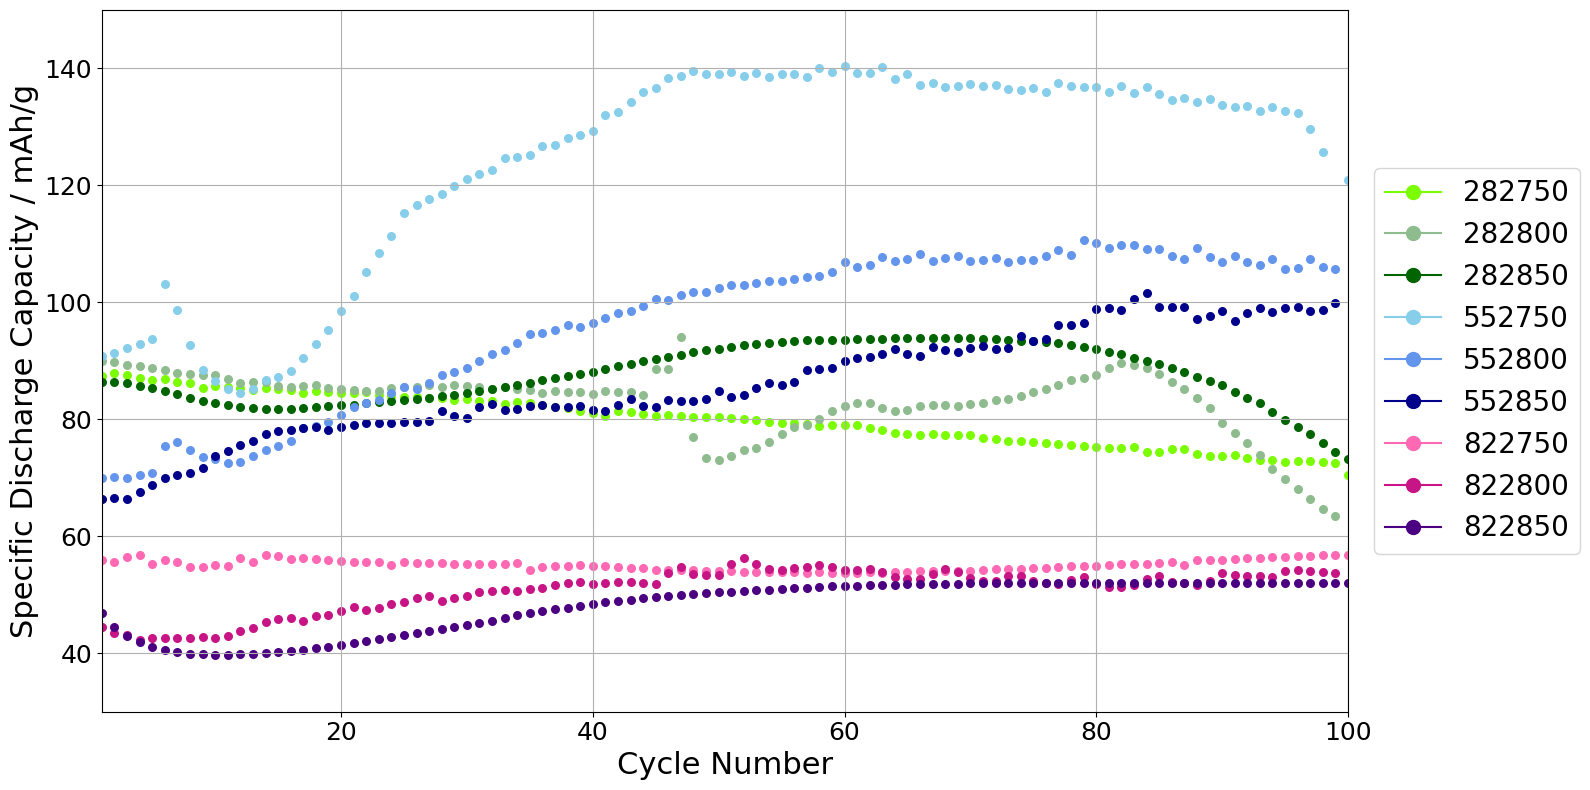

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
from matplotlib.lines import Line2D  # Import Line2D for custom legend handles

# Define the directory where your Excel files are located
directory = '/Users/harryfyjis-walker/Desktop/Part II Stuff/Electrochem Data for analaysis/282552822GCD'

# Get a list of all Excel files in the directory
file_list = [filename for filename in os.listdir(directory) if filename.endswith('.xlsx')]

# Define colors based on six or seven consecutive numbers extracted from filenames
color_mapping = {
    '282750': 'lawngreen',
    '282800': 'darkseagreen',
    '282850': 'darkgreen',
    '552750': 'skyblue',
    '552800': 'cornflowerblue',
    '552850': 'darkblue',
    '822750': 'hotpink',
    '822800': 'mediumvioletred',
    '822850': 'indigo',
}

# Define the custom order of labels for the legend
custom_legend_order = ['282750', '282800', '282850', '552750', '552800', '552850', '822750', '822800', '822850']

# Initialize empty lists to store DataFrames and labels for both sets of columns
all_x_values = []
all_y_values = []
labels = []

# Iterate over each Excel file
for excel_file in file_list:
    try:
        # Load the Excel file into a DataFrame
        df = pd.read_excel(os.path.join(directory, excel_file))

        # Extract the numeric part from the filename
        label_match = re.search(r'(\d+)', excel_file)
        if label_match:
            label = label_match.group(1)  # Extract the first sequence of digits
            # Check if the label exists in color_mapping
            if label in color_mapping:
                # Initialize lists to store x and y values for the current file
                x_values = []
                y_values = []

                # Iterate over columns and find the final non-zero value for each odd-numbered column
                for col in df.columns:
                    if 'Col' in col and int(col.split('Col')[-1]) % 2 != 0:
                        # Find the last non-zero and non-NaN value in the column
                        non_zero_values = df[col][(df[col] != 0) & (~df[col].isnull())]
                        if not non_zero_values.empty:
                            final_value = non_zero_values.iloc[-1]
                            cycle_number = (int(col.split('Col')[-1]) + 1) / 2
                            if cycle_number <= 100:  # Only append values up to cycle number 98
                                x_values.append(final_value)
                                y_values.append(cycle_number)  # Calculate the corresponding y-value

                # Append the x and y values for the current file to the lists storing all values
                all_x_values.append(x_values)
                all_y_values.append(y_values)
                labels.append(label)
            else:
                print(f"No color mapping found for label: {label}")

    except FileNotFoundError:
        print(f"File not found at: {excel_file}")

plt.figure(figsize=(16, 8))

# Create a list to store legend handles and labels in the custom order
custom_legend_handles = []
custom_legend_labels = []

# Plot all the data points on one scatter plot with unique colors and labels
for label in custom_legend_order:
    if label in labels and label in color_mapping:
        idx = labels.index(label)
        custom_legend_handles.append(Line2D([0], [0], marker='o', color=color_mapping[label], label=label, markersize=10))
        custom_legend_labels.append(label)
        plt.scatter(all_y_values[idx], all_x_values[idx], color=color_mapping[label], label=label, s=30, marker='o')  # Specify marker style as 'o'

# Add legend with custom handles (lines instead of blocks) and custom order
plt.legend(handles=custom_legend_handles, labels=custom_legend_labels, loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize=20)

# Add labels and title to the plot
plt.xlabel('Cycle Number', fontsize=22)
plt.ylabel('Specific Discharge Capacity / mAh/g', fontsize=22)

plt.ylim(0, 150)
plt.xlim(1, 100)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(30,150)

plt.grid(True)

plt.tight_layout()

output_file = "/Users/harryfyjis-walker/Desktop/Part II Stuff/figures/282552822CapCycleNumberFinal.pdf"
plt.savefig(output_file, format='pdf')

plt.show()
